###Required libraries



In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install regex
!pip3 install pybamm

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import math

##Importing and preparing the dataset

In [2]:
dataset = pd.read_csv('Load Profiles.csv')
dataset

,Date/Time,Heating/Cooling,Fans,InteriorLights,ExteriorLights,InteriorEquipment,Misc : InteriorEquipment
0,01/01 01:00:00,0.249108,0.048803,0.061268,0.011206,2.826843,0.315209
1,01/01 02:00:00,0.286937,0.056214,0.035740,0.006537,3.130111,0.290224
2,01/01 03:00:00,0.313726,0.061462,0.025528,0.004669,3.371758,0.286859
3,01/01 04:00:00,0.336854,0.065993,0.025528,0.004669,3.607986,0.282821
4,01/01 05:00:00,0.358424,0.070219,0.025528,0.004669,3.888659,0.272138
...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.098779,0.019352,0.295776,0.054100,2.069969,0.501625
8756,12/31 21:00:00,0.105840,0.020735,0.269368,0.049269,2.015142,0.518871
8757,12/31 22:00:00,0.112770,0.022093,0.227114,0.041541,1.967728,0.506757
8758,12/31 23:00:00,0.129033,0.025279,0.169015,0.030914,1.971973,0.438533


In [3]:
data = dataset.to_numpy()
Total = []
for row in data:
    Total.append(np.sum(row[1:]))

##Importing Location data

In [4]:
loc_data = pd.read_csv('Location Data.csv')
loc_data

,Time,Wind speed (m/s),Solar insolation (kW/m2)
0,1,4,0.0000
1,2,4,0.0000
2,3,5,0.0000
3,4,5,0.0000
4,5,4,0.0000
5,6,4,0.0000
6,7,5,0.0000
7,8,4,0.3736
8,9,3,0.7252
9,10,4,0.8619


##Function for calculating Wind and Solar energy produced

In [5]:
vci = 2 # m/s
vco = 20 # m/s
vr = 5 # m/s
Pr = 2 # kW
area = 3 # m^2

def gen_loc(data):
    P_out = []
    for v in data['Wind speed (m/s)']:
        if v < vci or v > vco:
            P_out.append(0)
        elif v >= vci and v <= vr: 
            P_out.append(round((Pr*(v-vci)/(vr-vci)), 4))
        elif v > vr and v <= vco:
            P_out.append(Pr)

    data['Solar Power (kW)'] = data['Solar insolation (kW/m2)'] * area
    data['Wind Power (kW)'] = P_out

In [6]:
gen_loc(loc_data)
loc_data

,Time,Wind speed (m/s),Solar insolation (kW/m2),Solar Power (kW),Wind Power (kW)
0,1,4,0.0000,0.0000,1.3333
1,2,4,0.0000,0.0000,1.3333
2,3,5,0.0000,0.0000,2.0000
3,4,5,0.0000,0.0000,2.0000
4,5,4,0.0000,0.0000,1.3333
5,6,4,0.0000,0.0000,1.3333
6,7,5,0.0000,0.0000,2.0000
7,8,4,0.3736,1.1208,1.3333
8,9,3,0.7252,2.1756,0.6667
9,10,4,0.8619,2.5857,1.3333


##Utility function for graphs of Load, Generation, power supplied to the battery and power taken from the Grid

In [7]:
def analyze_day(load, loc_data, title):

    generation = loc_data['Solar Power (kW)'] + loc_data['Wind Power (kW)']
    battery = [0]*24
    grid = [0]*24

    for i in range(24):
            if load[i] > generation[i]:
                grid[i] = load[i] - generation[i]
            if load[i] < generation[i]:
                battery[i] = generation[i] - load[i]

    plt.xlabel('Time')
    plt.ylabel('Power (kW)')
    plt.plot(load, 'r')
    plt.plot(generation, 'g')
    plt.plot(battery, 'b')
    plt.plot(grid, 'y')
    plt.legend(['Load', 'Generation', 'Battery', 'Grid'])
    plt.title(title)
    plt.show()

    return battery, grid

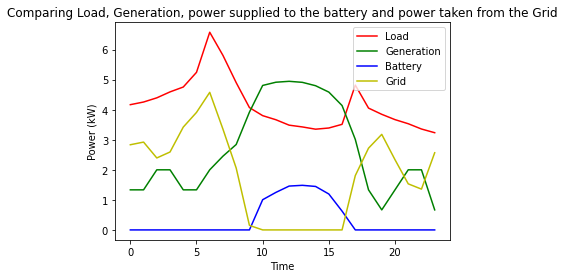

In [8]:
d = 64
battery, grid = analyze_day(Total[(24*d):(24*(d+1))], loc_data, 'Comparing Load, Generation, power supplied to the battery and power taken from the Grid')

##Function for generating list of battery operations

In [9]:
def battery_operation(battery, grid):
  experiment = []
  for i in range(6, 19):
    if battery[i] > 0:
      experiment.append("Charge at C/10 for 45 minutes")
      experiment.append("Rest for 15 minutes")
    elif grid[i] > 0:
      experiment.append("Discharge at C/10 for 45 minutes")
      experiment.append("Rest for 15 minutes")
  return experiment

In [10]:
experiment = battery_operation(battery, grid)
experiment

['Discharge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Discharge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Discharge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Discharge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Charge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Discharge at C/10 for 45 minutes',
 'Rest for 15 minutes',
 'Discharge at C/10 for 45 minutes',
 'Rest for 15 minutes']

##Battery Simulation

In [11]:
import pybamm
experiment = pybamm.Experiment(experiment)
model = pybamm.lithium_ion.DFN() # Doyle-Fuller-Newman model
sim = pybamm.Simulation(model, experiment = experiment, solver=pybamm.CasadiSolver())
sim.solve()
sim.plot()


Bad key "pcolor.shading" on line 22 in
/usr/local/lib/python3.7/dist-packages/pybamm/plotting/pybamm.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


interactive(children=(FloatSlider(value=0.0, description='t', max=13.000000000000004, step=0.13000000000000003…